In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


def linear_regression_with_preprocessing(data):
    # Vorausgesetzt, die Daten sind in einem DataFrame
    # 'Cov' und 'Inter' sind die Merkmale (X) und 'Mape' ist das Ziel (Y)

    # Features and target variable
    X = data[['Cov', 'Inter']]
    y = data['Mape']

    # Split into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate performance metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Model coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Output results
    print("Training Mean Squared Error: ", mse_train)
    print("Test Mean Squared Error: ", mse_test)
    print("Training R^2 Score: ", r2_train)
    print("Test R^2 Score: ", r2_test)
    print("Model Coefficients: ", coefficients)
    print("Model Intercept: ", intercept)

    # Return model and scaler for further use if needed
    return model, scaler

# Beispiel für die Nutzung der Funktion
# data = pd.read_csv('your_data.csv')  # Lese die Daten aus einer CSV-Datei
# model, scaler = linear_regression_with_preprocessing(data)


In [2]:
import os

exp_path = "/mnt/e/Experiment_x264_energy"
data = pd.read_csv(os.path.join(exp_path, "coverage_mape.csv"), sep=";")

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

def linear_regression_with_polynomial_features(data, features, target, degree=2, interaction_only=False):
    # Auswahl der Merkmale und der Zielvariable
    X = data[features]
    y = data[target]

    # Aufteilen der Daten in Trainings- und Testdatensatz
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Erzeugen von Polynomial Features
    if degree==0:
        if len(features) > 1:
            vif_data = calculate_vif(pd.DataFrame(X, columns=features))
            print("Variance Inflation Factor (VIF) für Polynomial Features:")
            print(vif_data)
            print(f"max VIF: {vif_data['VIF'].max()}")
         # Standardisierung der Daten
        scaler = StandardScaler()
        X_train_poly_scaled = scaler.fit_transform(X_train)
        X_test_poly_scaled = scaler.transform(X_test)
        poly = None
    else:
        poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only)

        X_poly = poly.fit_transform(X)
        X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

        vif_data = calculate_vif(X_poly_df)
        print("Variance Inflation Factor (VIF) für Polynomial Features:")
        print(vif_data)
        print(f"max VIF: {vif_data['VIF'].max()}")

        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Standardisierung der Daten
        #scaler = StandardScaler()
        #X_train_poly_scaled = scaler.fit_transform(X_train_poly)
        #X_test_poly_scaled = scaler.transform(X_test_poly)
        scaler = None
        X_train_poly_scaled = X_train_poly
        X_test_poly_scaled = X_test_poly


    # Erstellen und Trainieren des Modells
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)

    # Vorhersagen machen
    y_pred_train = model.predict(X_train_poly_scaled)
    y_pred_test = model.predict(X_test_poly_scaled)

    # Leistungsmetriken berechnen
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Modellkoeffizienten
    coefficients = model.coef_
    intercept = model.intercept_

    # Ergebnisse ausgeben
    print("Training Mean Squared Error: ", mse_train)
    print("Test Mean Squared Error: ", mse_test)
    print("Training R^2 Score: ", r2_train)
    print("Test R^2 Score: ", r2_test)
    print("Model Coefficients: ", coefficients)
    print("Model Intercept: ", intercept)

    # Residuenplot für Testdaten
    plt.figure(figsize=(0.9*5, 0.9*4))
    plt.scatter(y_test, y_pred_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideale Vorhersage')
    plt.xlabel("Realer Mape")
    plt.ylabel("Vorhergesagter Mape")
    plt.title("")
    plt.xlim(0,0.13)
    plt.ylim(0,0.16)
    plt.show()

    # Residuenplot
    #residuals = y_test - y_pred_test
    #plt.scatter(y_pred_test, residuals)
    #plt.xlabel("Predicted Mape")
    #plt.ylabel("Residuals")
    #plt.title("Residuals Plot")
    #plt.axhline(y=0, color='r', linestyle='--')
    #plt.show()

    # Rückgabe des Modells und des Scalers für weitere Nutzung
    return model, scaler, poly, coefficients

In [19]:
df_select = data.loc[(data['Methode'] == "jackknife_plus_lin_lasso_None")]
df_select


,Methode,Strategie,Run,Mape,Cov,Inter
810,jackknife_plus_lin_lasso_None,Distance_1,run_1,0.033747,0.7175,0.091237
811,jackknife_plus_lin_lasso_None,Distance_1,run_10,0.034460,0.8350,0.123822
812,jackknife_plus_lin_lasso_None,Distance_1,run_11,0.033630,0.7275,0.090525
813,jackknife_plus_lin_lasso_None,Distance_1,run_12,0.029032,0.9300,0.148323
814,jackknife_plus_lin_lasso_None,Distance_1,run_13,0.034894,0.9075,0.145260
...,...,...,...,...,...,...
1075,jackknife_plus_lin_lasso_None,T-wise_3,run_5,0.026921,0.7150,0.076851
1076,jackknife_plus_lin_lasso_None,T-wise_3,run_6,0.025426,0.7550,0.077196
1077,jackknife_plus_lin_lasso_None,T-wise_3,run_7,0.024961,0.7750,0.076756
1078,jackknife_plus_lin_lasso_None,T-wise_3,run_8,0.027403,0.7000,0.077040


Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  8.110536
1   Inter  8.110536
max VIF: 8.110536224377281
Training Mean Squared Error:  1.6073468015054937e-05
Test Mean Squared Error:  1.5595171368702766e-05
Training R^2 Score:  0.8693560441917332
Test R^2 Score:  0.8867383299834206
Model Coefficients:  [-0.01020571  0.00832791]
Model Intercept:  0.02969328786646498


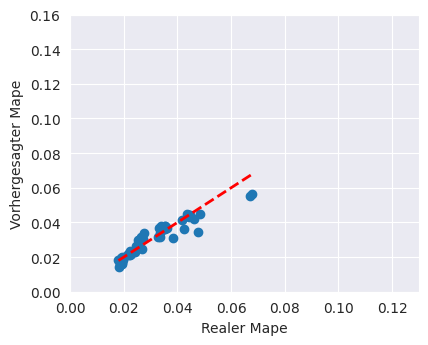

In [20]:
features = ['Cov', 'Inter']
target = 'Mape'

model, scaler, poly, coef = linear_regression_with_polynomial_features(df_select, features, target, degree=0, interaction_only=True)

In [21]:
methods = data.Methode.unique().tolist()
methods

['cv_plus_lin_None',
 'jackknife_plus_lin_None',
 'cv_plus_lin_lasso_None',
 'jackknife_plus_lin_lasso_None',
 'cv_plus_cart_None',
 'jackknife_plus_cart_None',
 'cv_plus_rf_None',
 'jackknife_plus_rf_None',
 'cv_plus_kr_None',
 'jackknife_plus_kr_None',
 'cqr_lin_quant_None',
 'cqr_lgbm_quant_None']

In [22]:
strategie = data.Strategie.unique().tolist()
strategie

['Distance_1',
 'Distance_2',
 'Distance_3',
 'OW',
 'Random_1',
 'Random_2',
 'Random_3',
 'T-wise_2',
 'T-wise_3']

Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  3.684034
1   Inter  3.684034
max VIF: 3.684033729980597
Training Mean Squared Error:  5.798303452229494e-05
Test Mean Squared Error:  5.7757958491578014e-05
Training R^2 Score:  0.8168044102436516
Test R^2 Score:  0.8037861191863495
Model Coefficients:  [-0.00726851  0.01587854]
Model Intercept:  0.029776873975405956


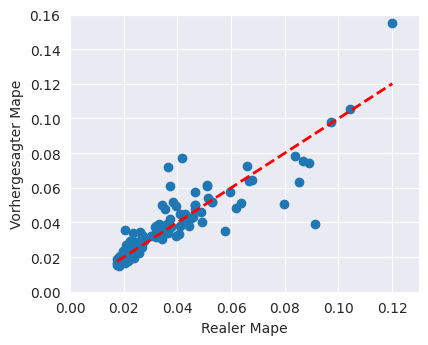

In [23]:
filtered_data = data[(data["Strategie"].str.startswith("Random")) & (data["Mape"] <= 0.2)]
model, scaler, poly, coef = linear_regression_with_polynomial_features(filtered_data, features, target, degree=0, interaction_only=True)

Training Mean Squared Error:  0.00010867634086006178
Test Mean Squared Error:  0.00013377398291617844
Training R^2 Score:  0.6566404894044346
Test R^2 Score:  0.5455463969747172
Model Coefficients:  [0.0144164]
Model Intercept:  0.02977687397540596


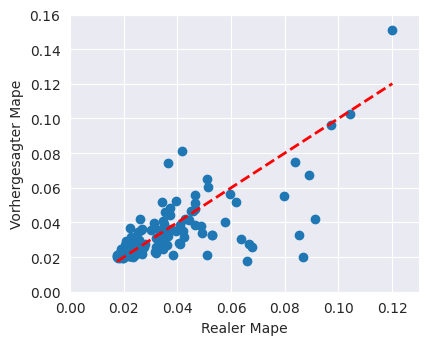

In [24]:
features2 = ['Inter']

#filtered_data = data[(data["Strategie"].str.startswith("Random")) & (data["Mape"] <= 0.2)]
model, scaler, poly, coef = linear_regression_with_polynomial_features(filtered_data, features2, target, degree=0, interaction_only=False)

Methode: cv_plus_lin_lasso_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.636769
1   Inter  7.636769
max VIF: 7.6367694131969674
Training Mean Squared Error:  1.7943411321700025e-05
Test Mean Squared Error:  1.515083856305265e-05
Training R^2 Score:  0.8541572836947149
Test R^2 Score:  0.8899653465016283
Model Coefficients:  [-0.009229    0.00844861]
Model Intercept:  0.02969328786646498


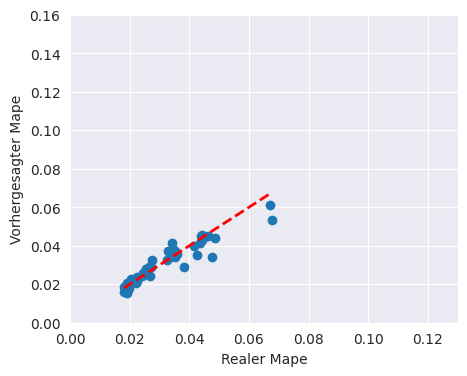

Methode: jackknife_plus_lin_lasso_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  8.110536
1   Inter  8.110536
max VIF: 8.110536224377281
Training Mean Squared Error:  1.6073468015054937e-05
Test Mean Squared Error:  1.5595171368702766e-05
Training R^2 Score:  0.8693560441917332
Test R^2 Score:  0.8867383299834206
Model Coefficients:  [-0.01020571  0.00832791]
Model Intercept:  0.02969328786646498


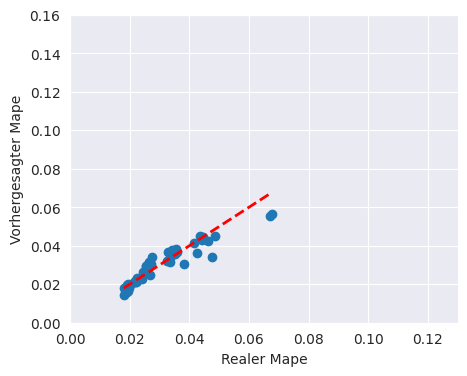

Methode: cv_plus_cart_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature     VIF
0     Cov  8.4001
1   Inter  8.4001
max VIF: 8.400099736495015
Training Mean Squared Error:  1.7066678126626208e-05
Test Mean Squared Error:  1.3169677889375398e-05
Training R^2 Score:  0.7943580130949218
Test R^2 Score:  0.8301082292248125
Model Coefficients:  [-0.00703336  0.00752055]
Model Intercept:  0.030595938509897648


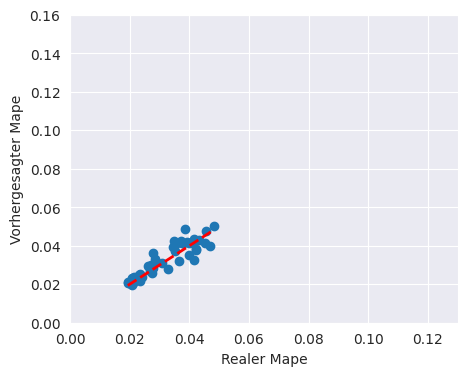

Methode: jackknife_plus_cart_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.921081
1   Inter  7.921081
max VIF: 7.921080894430735
Training Mean Squared Error:  1.5100245972999279e-05
Test Mean Squared Error:  1.0593563990126164e-05
Training R^2 Score:  0.8180521972932508
Test R^2 Score:  0.8633406708789175
Model Coefficients:  [-0.00788722  0.00869383]
Model Intercept:  0.030595938509897655


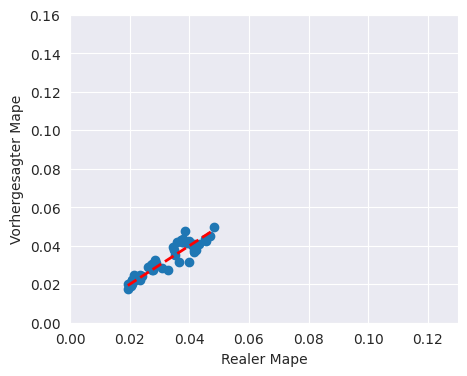

Methode: cv_plus_rf_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  6.766431
1   Inter  6.766431
max VIF: 6.766431121593093
Training Mean Squared Error:  3.9278915167087625e-05
Test Mean Squared Error:  7.037236337590757e-05
Training R^2 Score:  0.7387833275909332
Test R^2 Score:  0.5356108806795469
Model Coefficients:  [-0.00654816  0.01065354]
Model Intercept:  0.029359090495394768


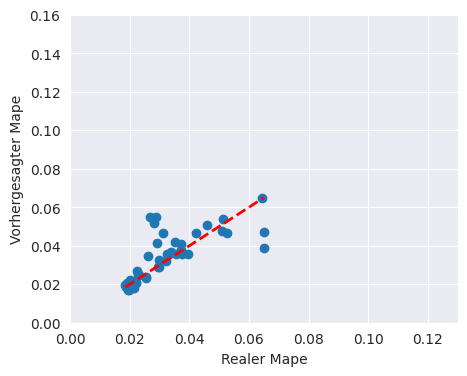

Methode: jackknife_plus_rf_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.298934
1   Inter  7.298934
max VIF: 7.298934244117331
Training Mean Squared Error:  5.083520133393822e-05
Test Mean Squared Error:  9.471477437219507e-05
Training R^2 Score:  0.6490358711203332
Test R^2 Score:  0.5308032587420424
Model Coefficients:  [-0.00544066  0.00992389]
Model Intercept:  0.029170609253540335


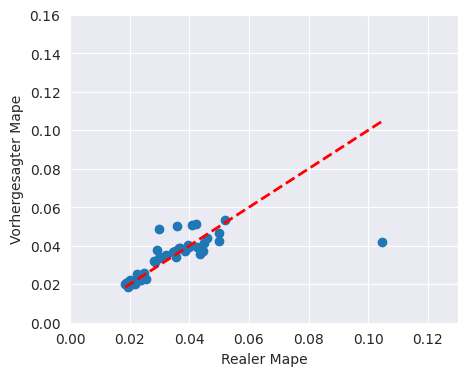

Methode: cv_plus_kr_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  4.790426
1   Inter  4.790426
max VIF: 4.790426227743139
Training Mean Squared Error:  6.226184920254297e-05
Test Mean Squared Error:  0.00014443166755247346
Training R^2 Score:  0.8792341924929996
Test R^2 Score:  0.7933302540927039
Model Coefficients:  [-0.00959407  0.0205416 ]
Model Intercept:  0.03583629435383125


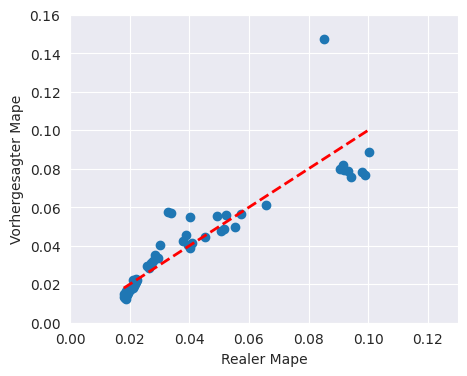

Methode: jackknife_plus_kr_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  4.973351
1   Inter  4.973351
max VIF: 4.973351484454517
Training Mean Squared Error:  5.189869332275487e-05
Test Mean Squared Error:  5.1291215020728e-05
Training R^2 Score:  0.8993350231649613
Test R^2 Score:  0.926606522272831
Model Coefficients:  [-0.01177485  0.01828723]
Model Intercept:  0.03583629435383124


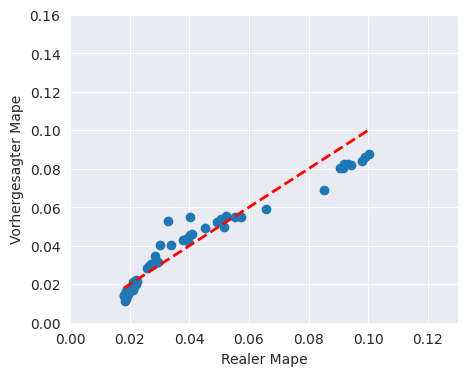

Methode: cqr_lin_quant_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  1.912783
1   Inter  1.912783
max VIF: 1.9127827076523236
Training Mean Squared Error:  0.0016103300909308463
Test Mean Squared Error:  0.00044671249446706456
Training R^2 Score:  0.5212213701856803
Test R^2 Score:  0.7907055413586926
Model Coefficients:  [-0.00703595  0.042364  ]
Model Intercept:  0.0601061015551848


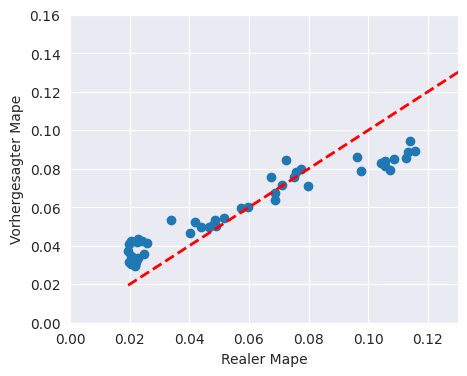

Methode: cqr_lgbm_quant_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.676827
1   Inter  7.676827
max VIF: 7.676826815421727
Training Mean Squared Error:  0.0002780457710516994
Test Mean Squared Error:  0.00033075819645596663
Training R^2 Score:  0.2759445113018981
Test R^2 Score:  0.3124732117933583
Model Coefficients:  [-0.0032345   0.01111151]
Model Intercept:  0.034462917178538686


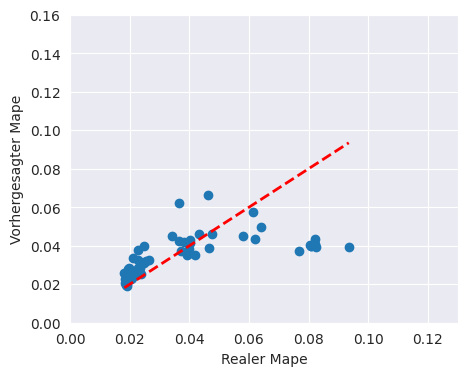

In [17]:
for m in methods:
    if m in ['cv_plus_lin_None',
 'jackknife_plus_lin_None']:
        continue
    print(f"Methode: {m}")
    data_select = data.loc[(data['Methode'] == m)]
    model, scaler, poly, coef = linear_regression_with_polynomial_features(data_select, features, target, degree=0, interaction_only=True)

Methode: cv_plus_lin_lasso_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.691335
1   Inter  7.691335
max VIF: 7.691334833297824
Training Mean Squared Error:  1.6199701141050182e-05
Test Mean Squared Error:  2.1415124280110577e-05
Training R^2 Score:  0.8219507714716895
Test R^2 Score:  0.9234853580813053
Model Coefficients:  [-0.00583541  0.00788014]
Model Intercept:  0.025785316314536087


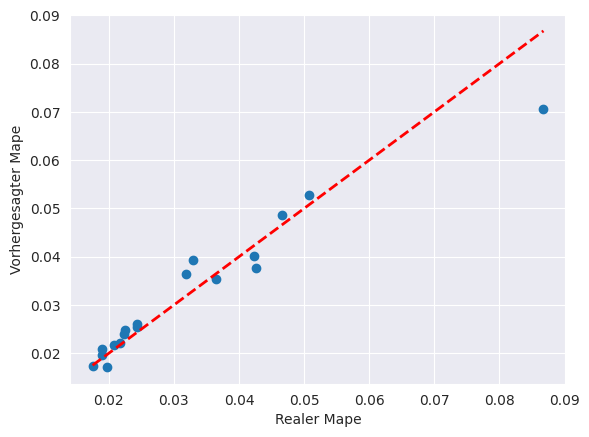

Methode: jackknife_plus_lin_lasso_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.910828
1   Inter  7.910828
max VIF: 7.910827896752939
Training Mean Squared Error:  1.5688364709322302e-05
Test Mean Squared Error:  3.664581832538813e-05
Training R^2 Score:  0.8275708169524586
Test R^2 Score:  0.8690672241585451
Model Coefficients:  [-0.00666447  0.00737113]
Model Intercept:  0.02578531631453609


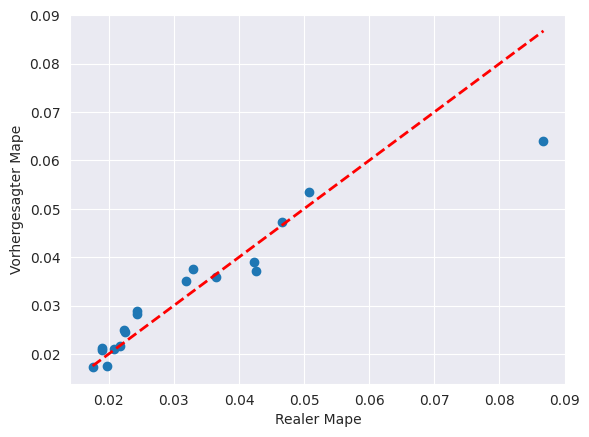

Methode: cv_plus_cart_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  10.52624
1   Inter  10.52624
max VIF: 10.526239659269468
Training Mean Squared Error:  1.1213923094558063e-05
Test Mean Squared Error:  5.046230844494128e-05
Training R^2 Score:  0.8123055094876172
Test R^2 Score:  0.7185752326807788
Model Coefficients:  [-0.00511285  0.00609988]
Model Intercept:  0.02692182420115506


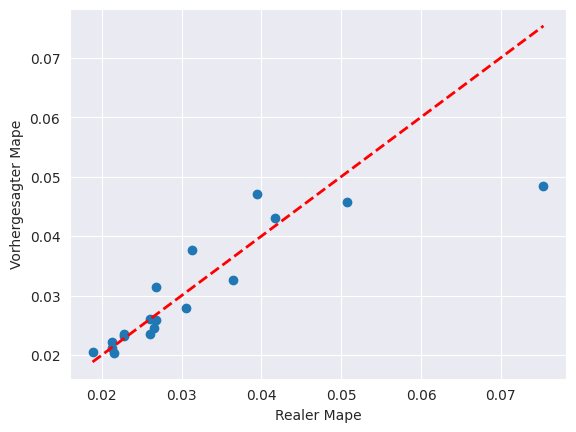

Methode: jackknife_plus_cart_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature        VIF
0     Cov  10.832831
1   Inter  10.832831
max VIF: 10.83283074117354
Training Mean Squared Error:  8.160916836539795e-06
Test Mean Squared Error:  4.7954680782306324e-05
Training R^2 Score:  0.8634055972354936
Test R^2 Score:  0.7325600968938435
Model Coefficients:  [-0.00518132  0.00717599]
Model Intercept:  0.026921824201155055


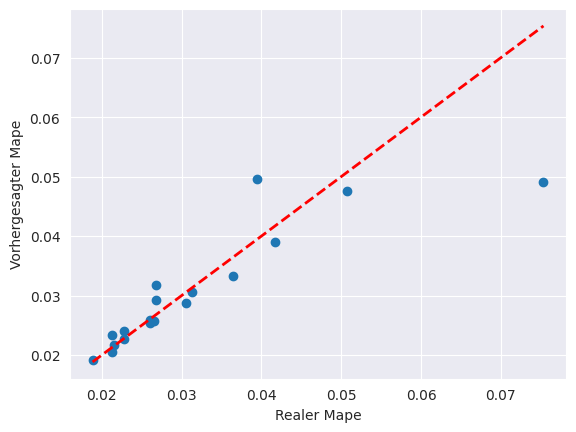

Methode: cv_plus_rf_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  6.681962
1   Inter  6.681962
max VIF: 6.6819617194198795
Training Mean Squared Error:  1.7481142357617774e-05
Test Mean Squared Error:  4.877446869820849e-05
Training R^2 Score:  0.7716395601667622
Test R^2 Score:  0.7035283602374465
Model Coefficients:  [-0.00255588  0.00861809]
Model Intercept:  0.025279833716852256


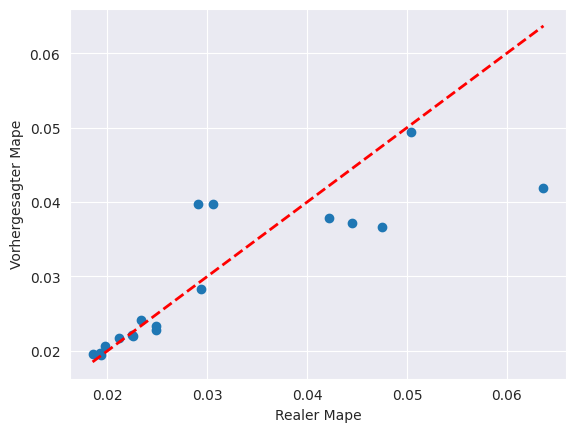

Methode: jackknife_plus_rf_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  7.057874
1   Inter  7.057874
max VIF: 7.057874139820562
Training Mean Squared Error:  1.1015587807999756e-05
Test Mean Squared Error:  2.964122765865187e-05
Training R^2 Score:  0.8713818692362846
Test R^2 Score:  0.6077038976401161
Model Coefficients:  [-0.00283235  0.00961302]
Model Intercept:  0.0260803592385559


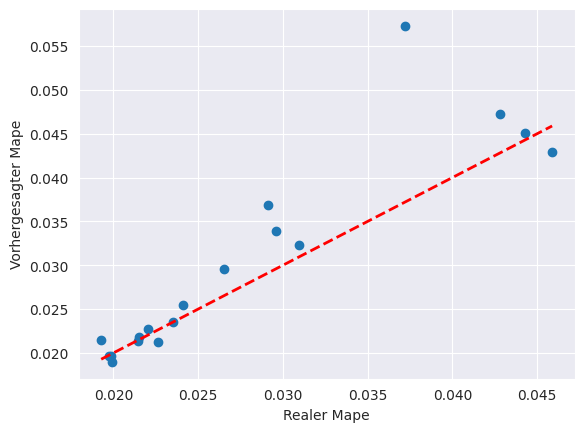

Methode: cv_plus_kr_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  4.647047
1   Inter  4.647047
max VIF: 4.647047244949096
Training Mean Squared Error:  1.6478208230254885e-05
Test Mean Squared Error:  1.6795827759888324e-05
Training R^2 Score:  0.8383255429044808
Test R^2 Score:  0.9550732415986525
Model Coefficients:  [-0.0037291   0.00940358]
Model Intercept:  0.02593511212816894


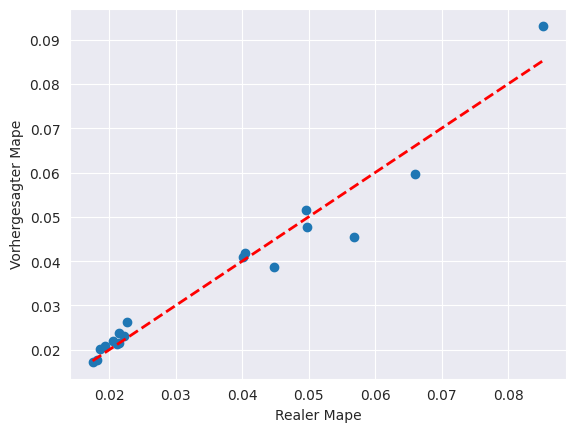

Methode: jackknife_plus_kr_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  6.649959
1   Inter  6.649959
max VIF: 6.649959139528413
Training Mean Squared Error:  1.3348298780877455e-05
Test Mean Squared Error:  4.305610815144746e-05
Training R^2 Score:  0.8690343677909839
Test R^2 Score:  0.884830244970598
Model Coefficients:  [-0.00509906  0.00899627]
Model Intercept:  0.025935112128168944


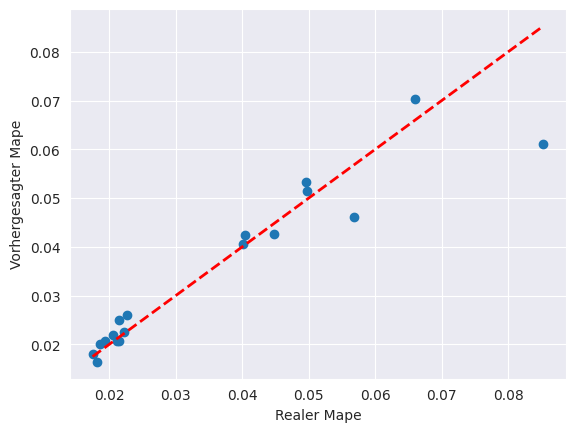

Methode: cqr_lin_quant_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature      VIF
0     Cov  2.12518
1   Inter  2.12518
max VIF: 2.125180281222153
Training Mean Squared Error:  6.991609383176584e-05
Test Mean Squared Error:  1.3844083854539957e-05
Training R^2 Score:  0.9487066326205312
Test R^2 Score:  0.9932177662790853
Model Coefficients:  [-0.00799019  0.035797  ]
Model Intercept:  0.041183690020213


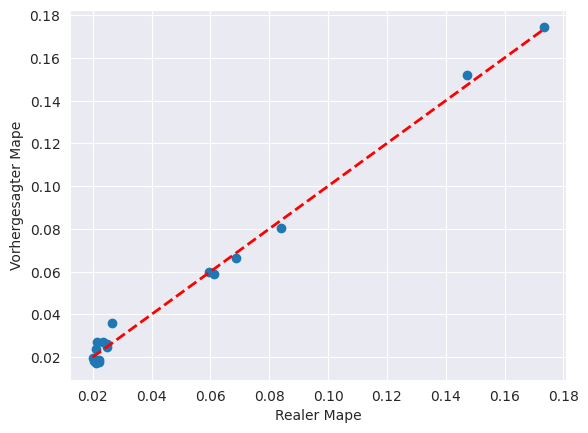

Methode: cqr_lgbm_quant_None
Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  5.398166
1   Inter  5.398166
max VIF: 5.398166476930339
Training Mean Squared Error:  5.914246524586452e-05
Test Mean Squared Error:  7.110063897032569e-05
Training R^2 Score:  0.4904820082660034
Test R^2 Score:  0.6938676710262752
Model Coefficients:  [-0.00282524  0.00783181]
Model Intercept:  0.027195025471169983


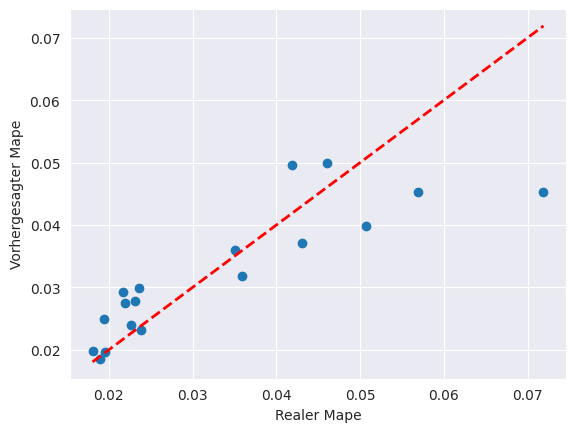

[array([-0.00583541,  0.00788014]),
 array([-0.00666447,  0.00737113]),
 array([-0.00511285,  0.00609988]),
 array([-0.00518132,  0.00717599]),
 array([-0.00255588,  0.00861809]),
 array([-0.00283235,  0.00961302]),
 array([-0.0037291 ,  0.00940358]),
 array([-0.00509906,  0.00899627]),
 array([-0.00799019,  0.035797  ]),
 array([-0.00282524,  0.00783181])]

In [42]:
features = ['Cov', 'Inter']
target = 'Mape'
coef_list = []

for m in methods:
    if m in ['cv_plus_lin_None',
            'jackknife_plus_lin_None']:
        continue
    print(f"Methode: {m}")
    data_select = filtered_data.loc[(data['Methode'] == m)]
    model, scaler, poly, coef = linear_regression_with_polynomial_features(data_select, features, target, degree=0)
    coef_list.append(coef)
coef_list

In [31]:
coef_x264 = coef_list.copy()

In [32]:
coef_x264

[array([-0.00891515,  0.02031281]),
 array([-0.00805733,  0.02124107]),
 array([-0.00542235,  0.01820019]),
 array([-0.00509583,  0.0192221 ]),
 array([-0.0052908 ,  0.02537281]),
 array([-0.00510924,  0.02366786]),
 array([-0.00971782,  0.021523  ]),
 array([-0.00901676,  0.02239329]),
 array([-0.00765217,  0.0367921 ]),
 array([-0.00713934,  0.02122322])]

Strategie: Distance_1
Variance Inflation Factor (VIF) für Polynomial Features:
     feature         VIF
0          1  464.970283
1        Cov   77.844930
2      Inter  733.253994
3      Cov^2  117.533991
4  Cov Inter  836.640643
5    Inter^2    9.577224
max VIF: 836.6406426255021
Training Mean Squared Error:  0.00010753172442170985
Test Mean Squared Error:  0.00014557559770425445
Training R^2 Score:  0.8783365325615177
Test R^2 Score:  0.37147333739720256
Model Coefficients:  [ 0.         -0.16753109  1.05516309  0.12567453 -0.94017609  0.02088682]
Model Intercept:  0.0545243688289558


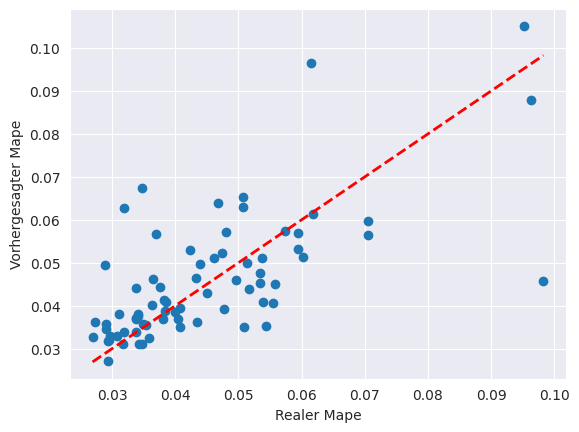

ValueError: too many values to unpack (expected 3)

In [14]:
for s in strategie:
    print(f"Strategie: {s}")
    data_select = data.loc[(data['Strategie'] == s)]
    model, scaler, poly = linear_regression_with_polynomial_features(data_select, features, target)

Variance Inflation Factor (VIF) für Polynomial Features:
  feature       VIF
0     Cov  2.277536
1   Inter  2.277536
max VIF: 2.277535609475627
Training Mean Squared Error:  0.0017569580641504448
Test Mean Squared Error:  0.003826834409461761
Training R^2 Score:  0.158565497087771
Test R^2 Score:  -0.031811255316986475
Model Coefficients:  [-0.0078817   0.01801308]
Model Intercept:  0.038182015993056546


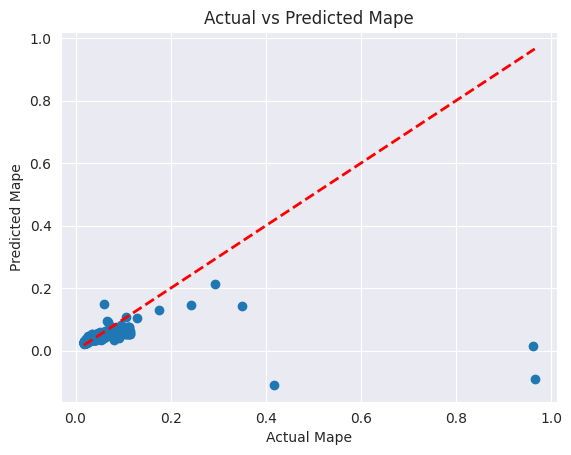

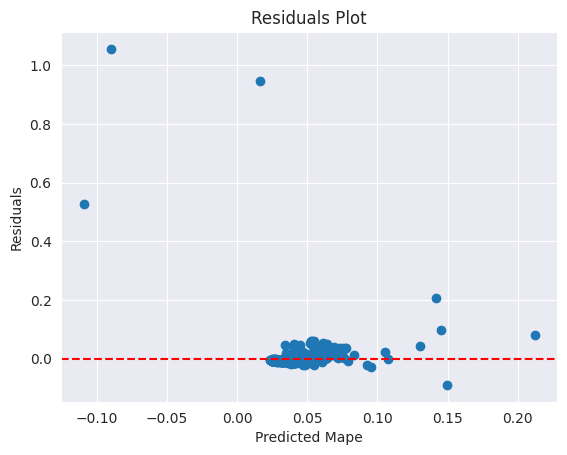

In [116]:
model, scaler, poly = linear_regression_with_polynomial_features(data, features, target, degree=0)